# **DATOS** **DE** **RASPBERRY**
(Presion, Temperatura, y Humedad)


## Codigo para toma de datos en raspberry:

In [1]:
#from datetime import datetime
    #import numpy as np
    #import os
    #import time
    #from sense_hat import SenseHat
    #sense=SenseHat()
   # while 1:
        #namefile=datetime.now().strftime("%Y-%m-%d") + ".csv"
        #if not os.path.exists("carpeta_donde_guardarlo"+ namefile):
            #f=open("carpeta_donde_se_guardo" + namefile, "w")
            #f.write("Datetime,Humedad,Temperatura,Presion\r\n")
            #f.close()
        #else:
           # d=open("carpeta_donde_se_guardo" + namefile, "a")
            #d.write(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
            #humidity=sense.get_humidity()
            #temp=sense.get.humidity()
            #pressure=sense.get_pressure()
            #d.write(",{:.2f},{:.2f},{:.2f}\r\n".format(humidity,temp,pressure))
            #d.close()
            #print("OK")
            #message="T:" + str(temp) + "P:" str(pressure)+ "H:"+str(humidity)
            #sense.show_message(message,scroll_speed=0.10)
            #time.sleep(1800)

## Codigo para presentacion de los datos en graficas

In [2]:
import pandas as pd #Instalacion(importacion) de libreria para la manipulacion y analisis de datos.
import numpy as np #Instalacion(importacion) de biblioteca para calculos numericos, facilita el trabajo con arrays (vectores y matrices), analisis y estructurar un gran volumen de datos,
import glob #Instalacion(importacion) de modulo nos sirve para buscar en una ruta para todos los nombres de los archivos.
import matplotlib.pyplot as plt #Instalacion(importacion) de libreria para la realizacion de graficas como histogramas.
import os #Instalacion(importacion) de modulo nos ayuda acceder a funcionalidades dependientes del sistema operativo.
from datetime import datetime #Instalacion(importacion) nos permite manipular fechas y horas

In [3]:
listafile=glob.glob("2023*.csv") #Buscar archivos con la terminacion 2023, en formato csv

In [4]:
listafile #Aqui es donde se mandan los archivos csv.

['2023-10-29.csv',
 '2023-10-05 (1).csv',
 '2023-10-26.csv',
 '2023-10-12.csv',
 '2023-10-25.csv',
 '2023-10-19.csv',
 '2023-10-24.csv',
 '2023-10-15.csv',
 '2023-10-18.csv',
 '2023-10-16.csv',
 '2023-10-27.csv',
 '2023-10-17.csv',
 '2023-10-10 (1).csv',
 '2023-10-07 (1).csv',
 '2023-10-09 (1).csv',
 '2023-10-28.csv',
 '2023-10-14.csv',
 '2023-10-20.csv',
 '2023-10-21.csv',
 '2023-10-30.csv',
 '2023-10-11.csv',
 '2023-10-13.csv',
 '2023-10-08 (1).csv']

In [5]:
data=[]
for files in listafile: #Los archivos en listafile
  data.append (pd.read_csv(files))
datafull=pd.concat(data,ignore_index=True) # Se recopilan los datos y se concatenan en una sola lista(datafull).

In [6]:
time=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S") #La columna datetime se les asigna elementos de fecha y hora, y se sustituye por una columna llamada time

In [7]:
datafull=datafull.drop(["Datetime"], axis=1)

In [8]:
datafull.insert(0,"Tiempo", time, True) #Las 3 lineas de cogido transforman la columna de fechas en un formato de pandas  para que se les asigne la variable tiempo, la cual se inserta a primcipio de dateframe para facilitar el manejo de la informacion termporal.

In [9]:
dataffl=datafull.sort_values(by=["Tiempo"], ignore_index=True) #Ordenar nuestro datafll dentro de la etapa de procesamiento

In [10]:
dataffl["Presion"].replace(0, np.nan, inplace=True)

In [11]:
type(dataffl["Presion"][0])

numpy.float64

In [12]:
np.isnan(dataffl["Presion"])

0       False
1       False
2       False
3       False
4       False
        ...  
1014    False
1015    False
1016    False
1017    False
1018    False
Name: Presion, Length: 1019, dtype: bool

In [13]:
j=0
for i in dataffl["Presion"]:
    if np.isnan(i):
        j +=1
print(j)

14


In [14]:
dataffl["Presion"].interpolate(method='polynomial',order=2,inplace=True)

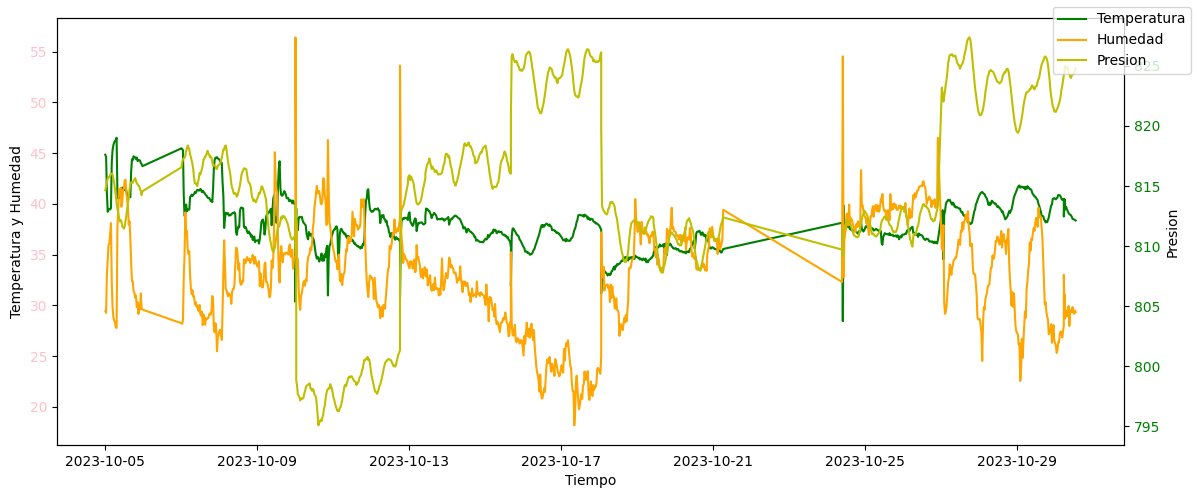

In [21]:
fig,ax1 = plt.subplots(figsize=(12,5)) #ploteando
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura y Humedad")
ax1.plot(dataffl["Tiempo"], dataffl[" Temperatura"], label="Temperatura", color="g")
ax1.tick_params (axis="y", labelcolor="pink")
ax1.plot(dataffl["Tiempo"],dataffl["Humedad"], label="Humedad", color="orange")
ax2=ax1.twinx()
ax2.set_ylabel("Presion")
ax2.plot(dataffl["Tiempo"], dataffl["Presion"],label="Presion", color="y")
ax2.tick_params (axis="y", labelcolor="g")
fig.legend(loc=1)
fig.tight_layout()

Text(0.5, 0, 'Presión')

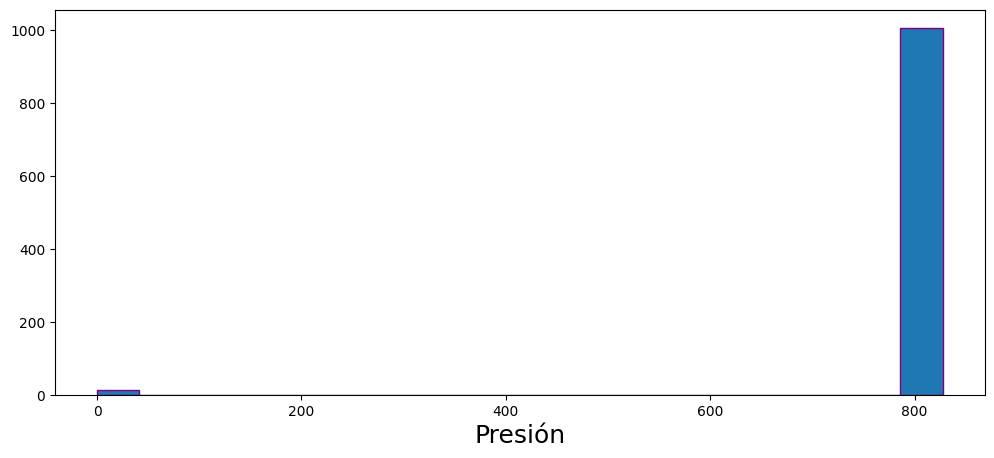

In [16]:
plt.figure(figsize=(12,5))
plt.hist(datafull["Presion"], bins=20, edgecolor="purple")
plt.xlabel("Presión", fontsize=18)


Text(0.5, 0, 'TEMPERATURA(°C)')

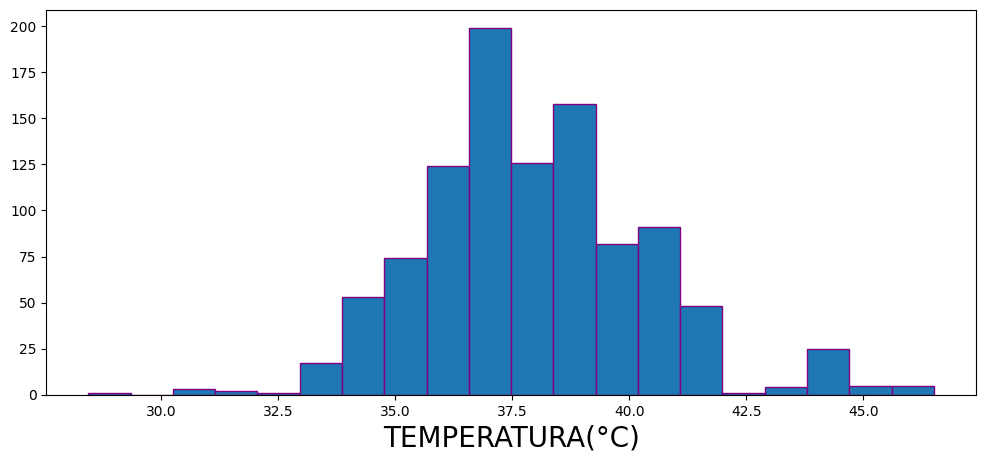

In [17]:
plt.figure(figsize=(12,5))
plt.hist(dataffl[" Temperatura"], bins=20, edgecolor="purple")
plt.xlabel("TEMPERATURA(°C)", fontsize=20)

Text(0.5, 0, 'HUMEDAD')

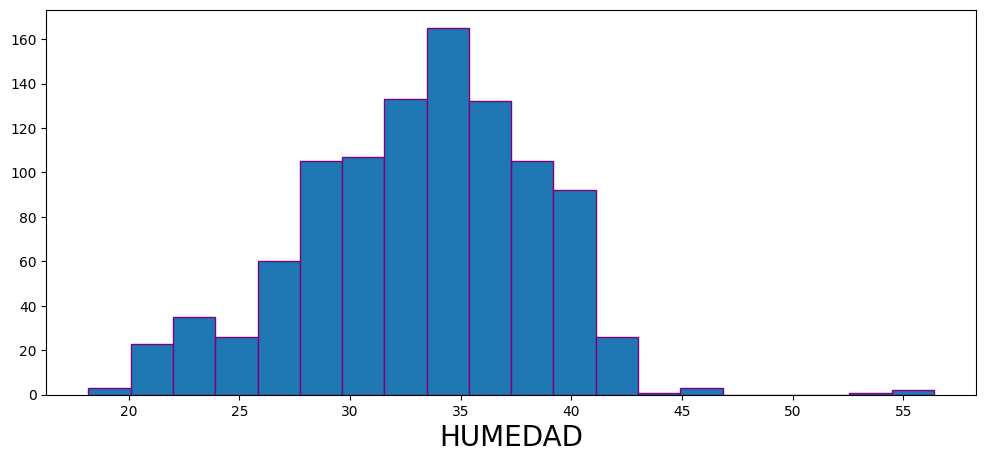

In [18]:
plt.figure(figsize=(12,5))
plt.hist(dataffl["Humedad"], bins=20, edgecolor="purple")
plt.xlabel("HUMEDAD", fontsize=20)